In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
import ROOT


Welcome to JupyROOT 6.28/00


In [2]:
uni = "20230331_edcn_type5_cla3_l3_max_mean_logcosh_7"   #### X,Y,Z new best / CHEP result

path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [3]:
df = pd.read_csv(pred_list[0])

In [4]:
pred = np.array(df['prediction']).reshape(-1,4)
label = np.array(df['label']).reshape(-1,4)
jade = np.array(df['jade']).reshape(-1,4)


In [5]:
energy_list = [1,2,3,4,5,6,7,8,9,10]
# energy_list = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

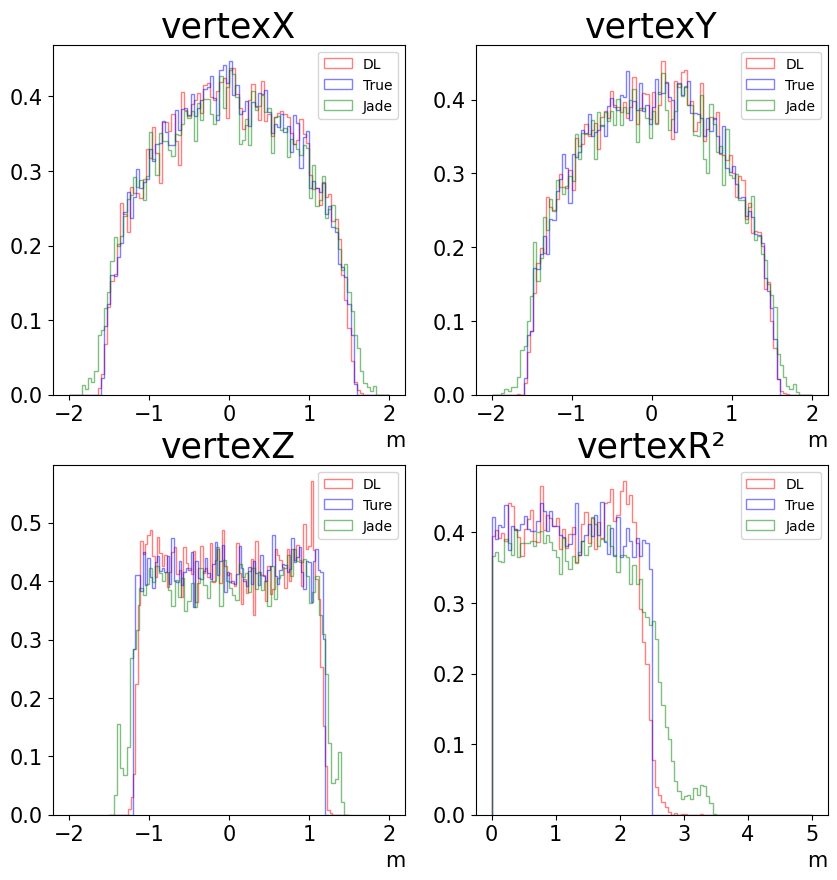

In [6]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(2,2,1)
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexX',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)
plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexY',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.500,1.500], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,2], bins = 100, range = [-1.500,1.500], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'Ture')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')
plt.title('vertexZ',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,5],color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,5], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexR\u00b2',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


/tmp/ipykernel_28941/493073415.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('gray')
/tmp/ipykernel_28941/493073415.py:39: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(2.56 - x**2)


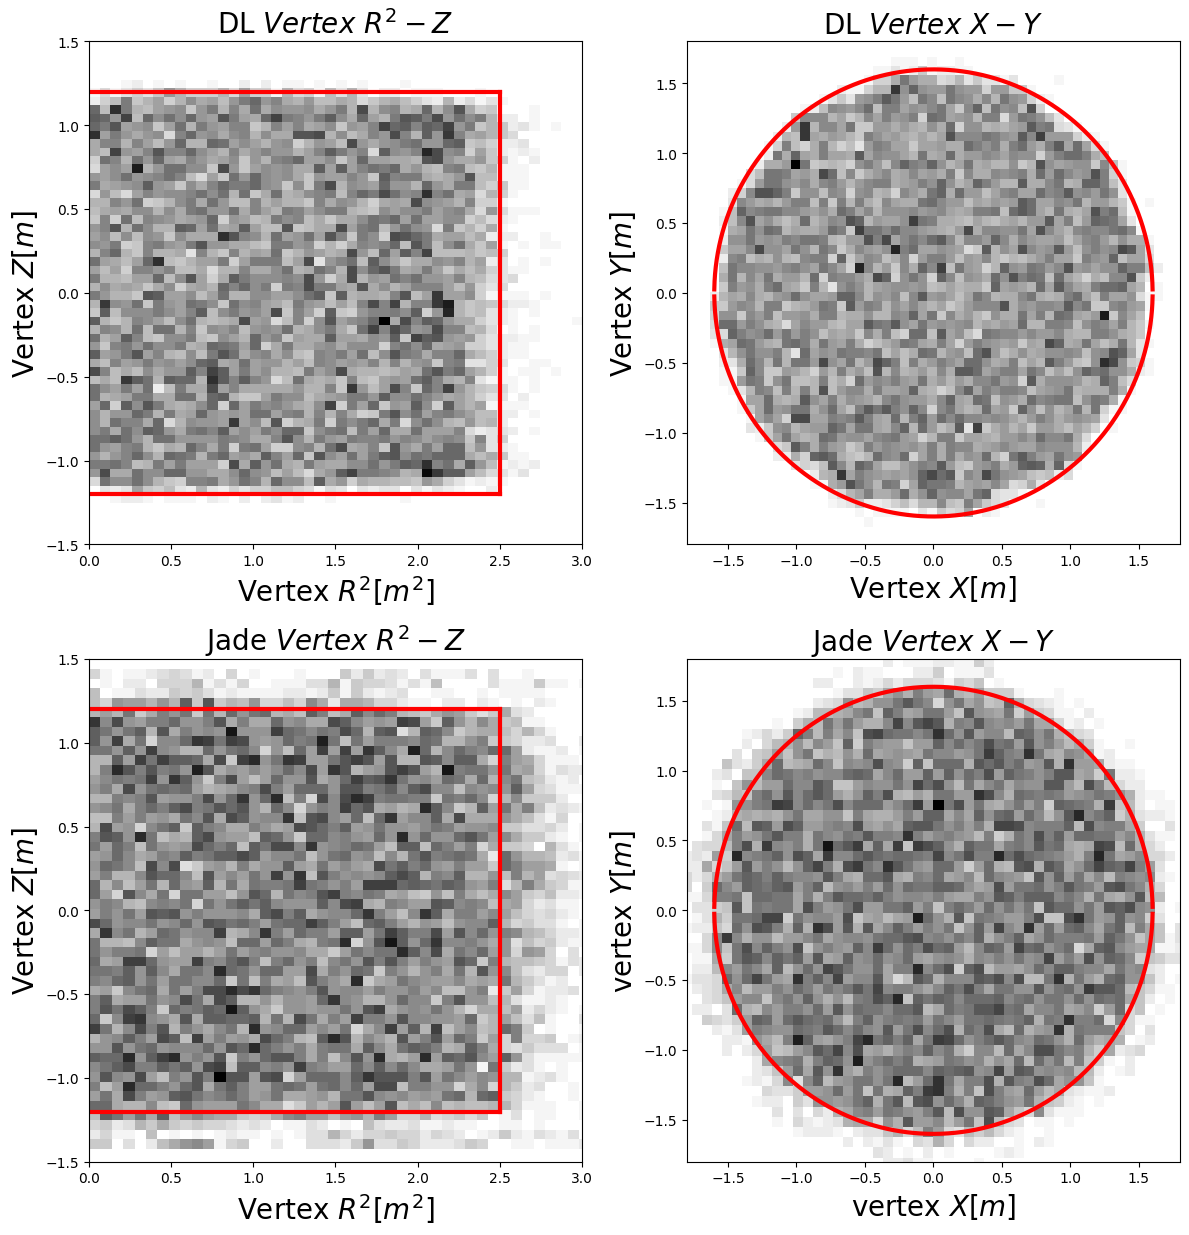

In [7]:
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()


plt.rcParams['figure.figsize'] = (12, 18)
plt.subplot(3,2,1)
plt.hist2d((pred[:,0]**2+pred[:,1]** 2),pred[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title('DL '+r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)

plt.subplot(3,2,3)
plt.hist2d((jade[:,0]**2+jade[:,1]** 2),jade[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title('Jade '+r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)



x = np.linspace(-100, 100, 500000)
y = np.sqrt(2.56 - x**2)

plt.subplot(3,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title('DL '+r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("Vertex "+r"$Y[m]$", fontsize=20)


plt.subplot(3,2,4)
plt.hist2d(jade[:,0],jade[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title('Jade '+r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("vertex "+r"$Y[m]$", fontsize=20)

plt.tight_layout()
plt.show()

Text(2.15, 1.35, 'Preliminary')

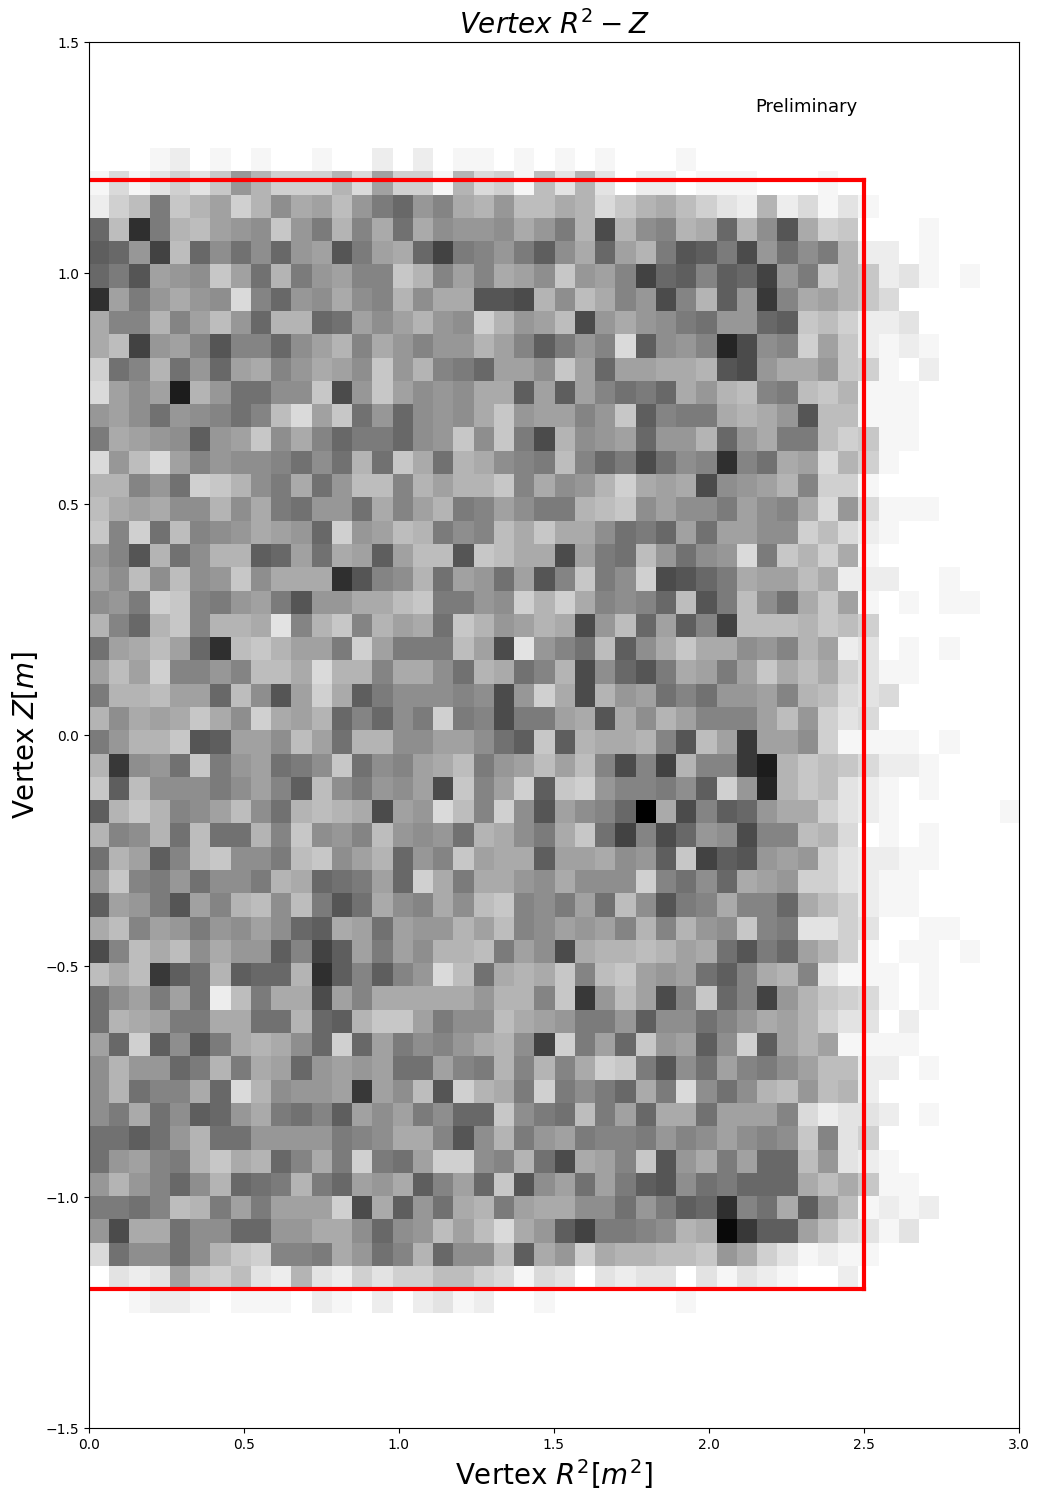

In [8]:
# plt.rcParams['figure.figsize'] = (12, 18)
# plt.subplot(3,2,1)
plt.hist2d((pred[:,0]**2+pred[:,1]** 2),pred[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title(r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)
plt.text(2.15,1.35,"Preliminary",fontsize=13)



/tmp/ipykernel_28941/1708418338.py:2: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(2.56 - x**2)


Text(0.8, 1.6, 'Preliminary')

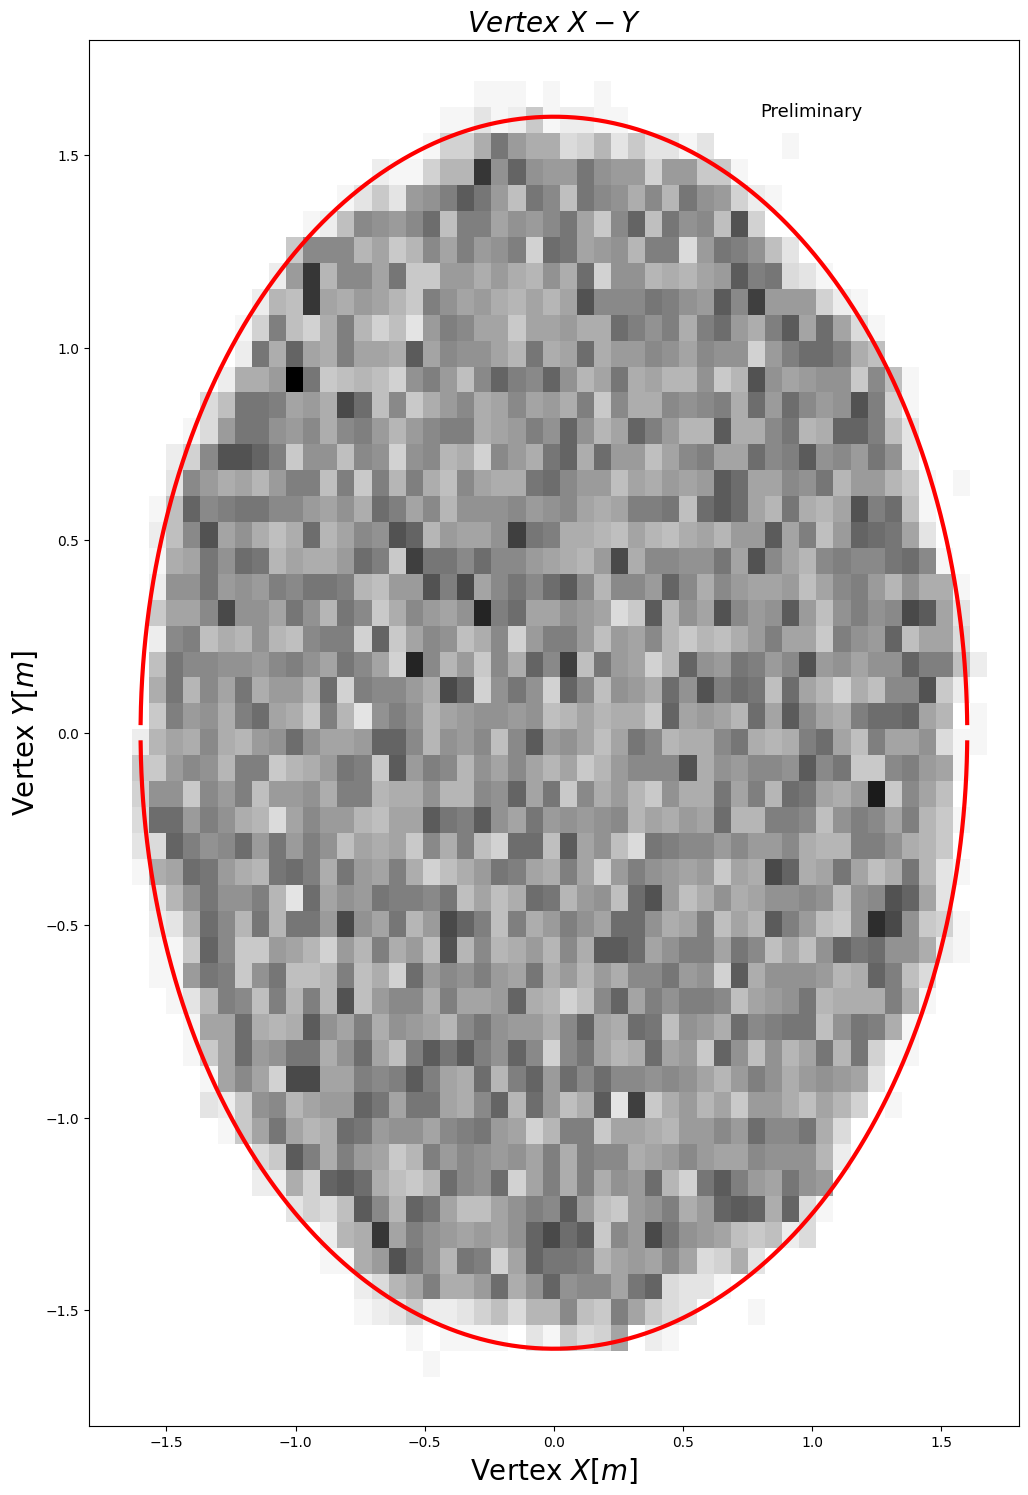

In [9]:
x = np.linspace(-100, 100, 500000)
y = np.sqrt(2.56 - x**2)

# plt.subplot(3,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title(r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("Vertex "+r"$Y[m]$", fontsize=20)
plt.text(0.8,1.6,"Preliminary",fontsize=13)


In [10]:
pred[:,2]

array([ 0.66608822, -0.22884233, -0.34767288, ..., -0.97640133,
       -1.10032201, -1.14479148])

A: 1072.61312 +/- 0.34696
mu: -1.15699 +/- 0.02101
sigma: 56.24022 +/- 0.02101


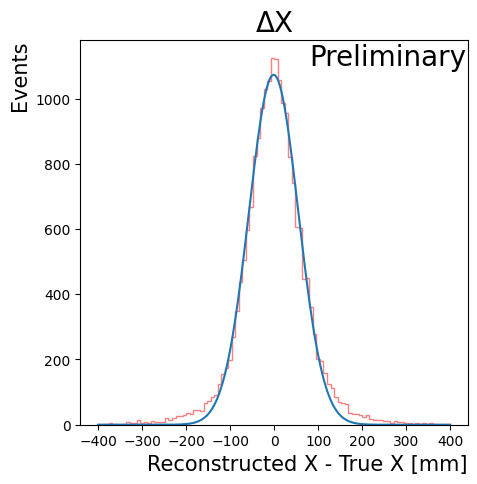

In [11]:
p1 = [100,10,50]
ran = 400
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


plt.rcParams['figure.figsize'] = (5, 5)

data = (pred[:,0] - label[:,0])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True,maxfev=800)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$X',fontsize = 20)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Reconstructed X - True X [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.text(80,1100,"Preliminary",fontsize=20)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()




A: 1073.10288 +/- 0.34603
mu: 1.87157 +/- 0.02105
sigma: 56.54298 +/- 0.02105


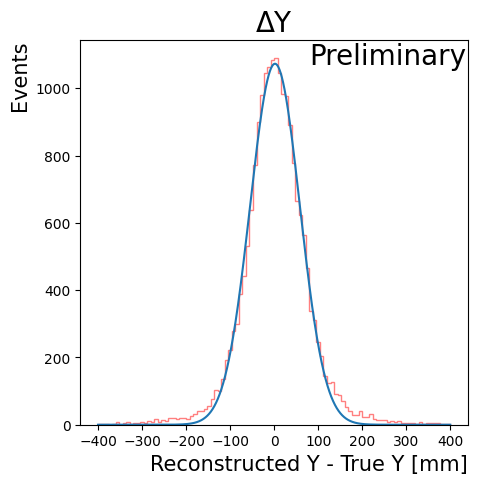

In [12]:
p1 = [100,10,50]
ran = 400
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


plt.rcParams['figure.figsize'] = (5, 5)

data = (pred[:,1] - label[:,1])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True,maxfev=800)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Y',fontsize = 20)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Reconstructed Y - True Y [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.text(80,1070,"Preliminary",fontsize=20)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()




A: 1160.32104 +/- 0.36094
mu: -0.03165 +/- 0.01867
sigma: 51.96617 +/- 0.01867


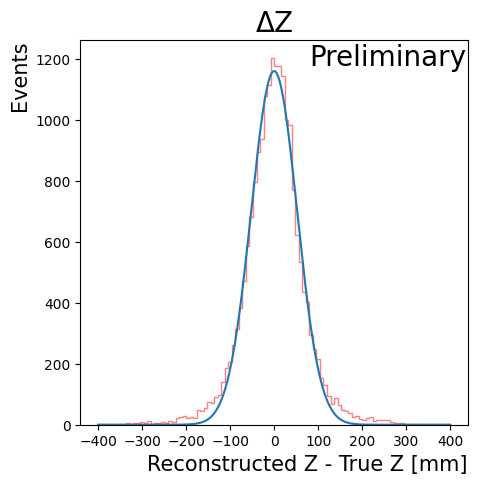

In [13]:
p1 = [100,10,50]
ran = 400
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


plt.rcParams['figure.figsize'] = (5, 5)

data = (pred[:,2] - label[:,2])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True,maxfev=800)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title(r'$\Delta$Z',fontsize = 20)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Reconstructed Z - True Z [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.text(80,1180,"Preliminary",fontsize=20)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()




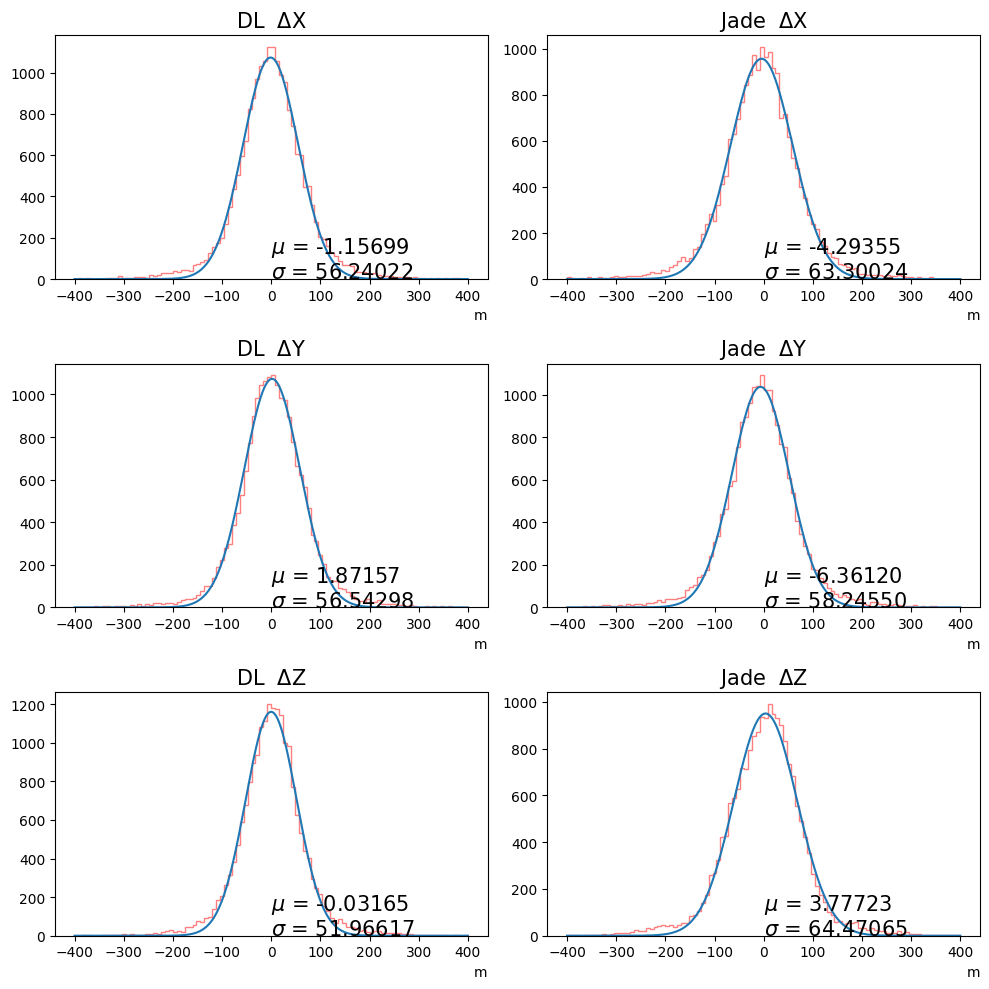

In [14]:
p1 = [100,10,50]
ran = 400
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(3,2,1)
tmp_hist = plt.hist((pred[:,0] - label[:,0])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
A = popt[0]; mu = popt[1]; sigma = popt[2]

plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,3)

tmp_hist = plt.hist((pred[:,1] - label[:,1])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)
tmp_hist = plt.hist((pred[:,2] - label[:,2])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,2)
tmp_hist = plt.hist((jade[:,0] - label[:,0])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,4)

tmp_hist = plt.hist((jade[:,1] - label[:,1])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)
tmp_hist = plt.hist((jade[:,2] - label[:,2])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
hist_xx = np.arange(-ran, ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.tight_layout()
plt.show()



In [15]:
re_mu_x = []
re_mu_y = []
re_mu_z = []

re_si_x = []
re_si_y = []
re_si_z = []
for a in energy_list:
    p1 = [100,10,50]
    ran = 400
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist((pred[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1, absolute_sigma=True)
        if vtx == 0:
            re_mu_x.append(popt[1])
            re_si_x.append(popt[2])
        if vtx == 1:
            re_mu_y.append(popt[1])
            re_si_y.append(popt[2])
        if vtx == 2:
            re_mu_z.append(popt[1])
            re_si_z.append(popt[2])
        plt.close()
        

In [16]:
ja_mu_x = []
ja_mu_y = []
ja_mu_z = []

ja_si_x = []
ja_si_y = []
ja_si_z = []
for a in energy_list:
    p1 = [100,10,0.15]
    ran = 350
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist((jade[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p1,  absolute_sigma=True)
        if vtx == 0:
            ja_mu_x.append(popt[1])
            ja_si_x.append(popt[2])
        if vtx == 1:
            ja_mu_y.append(popt[1])
            ja_si_y.append(popt[2])
        if vtx == 2:
            ja_mu_z.append(popt[1])
            ja_si_z.append(popt[2])
        plt.close()

/users/yewzzang/.conda/envs/pyg23/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


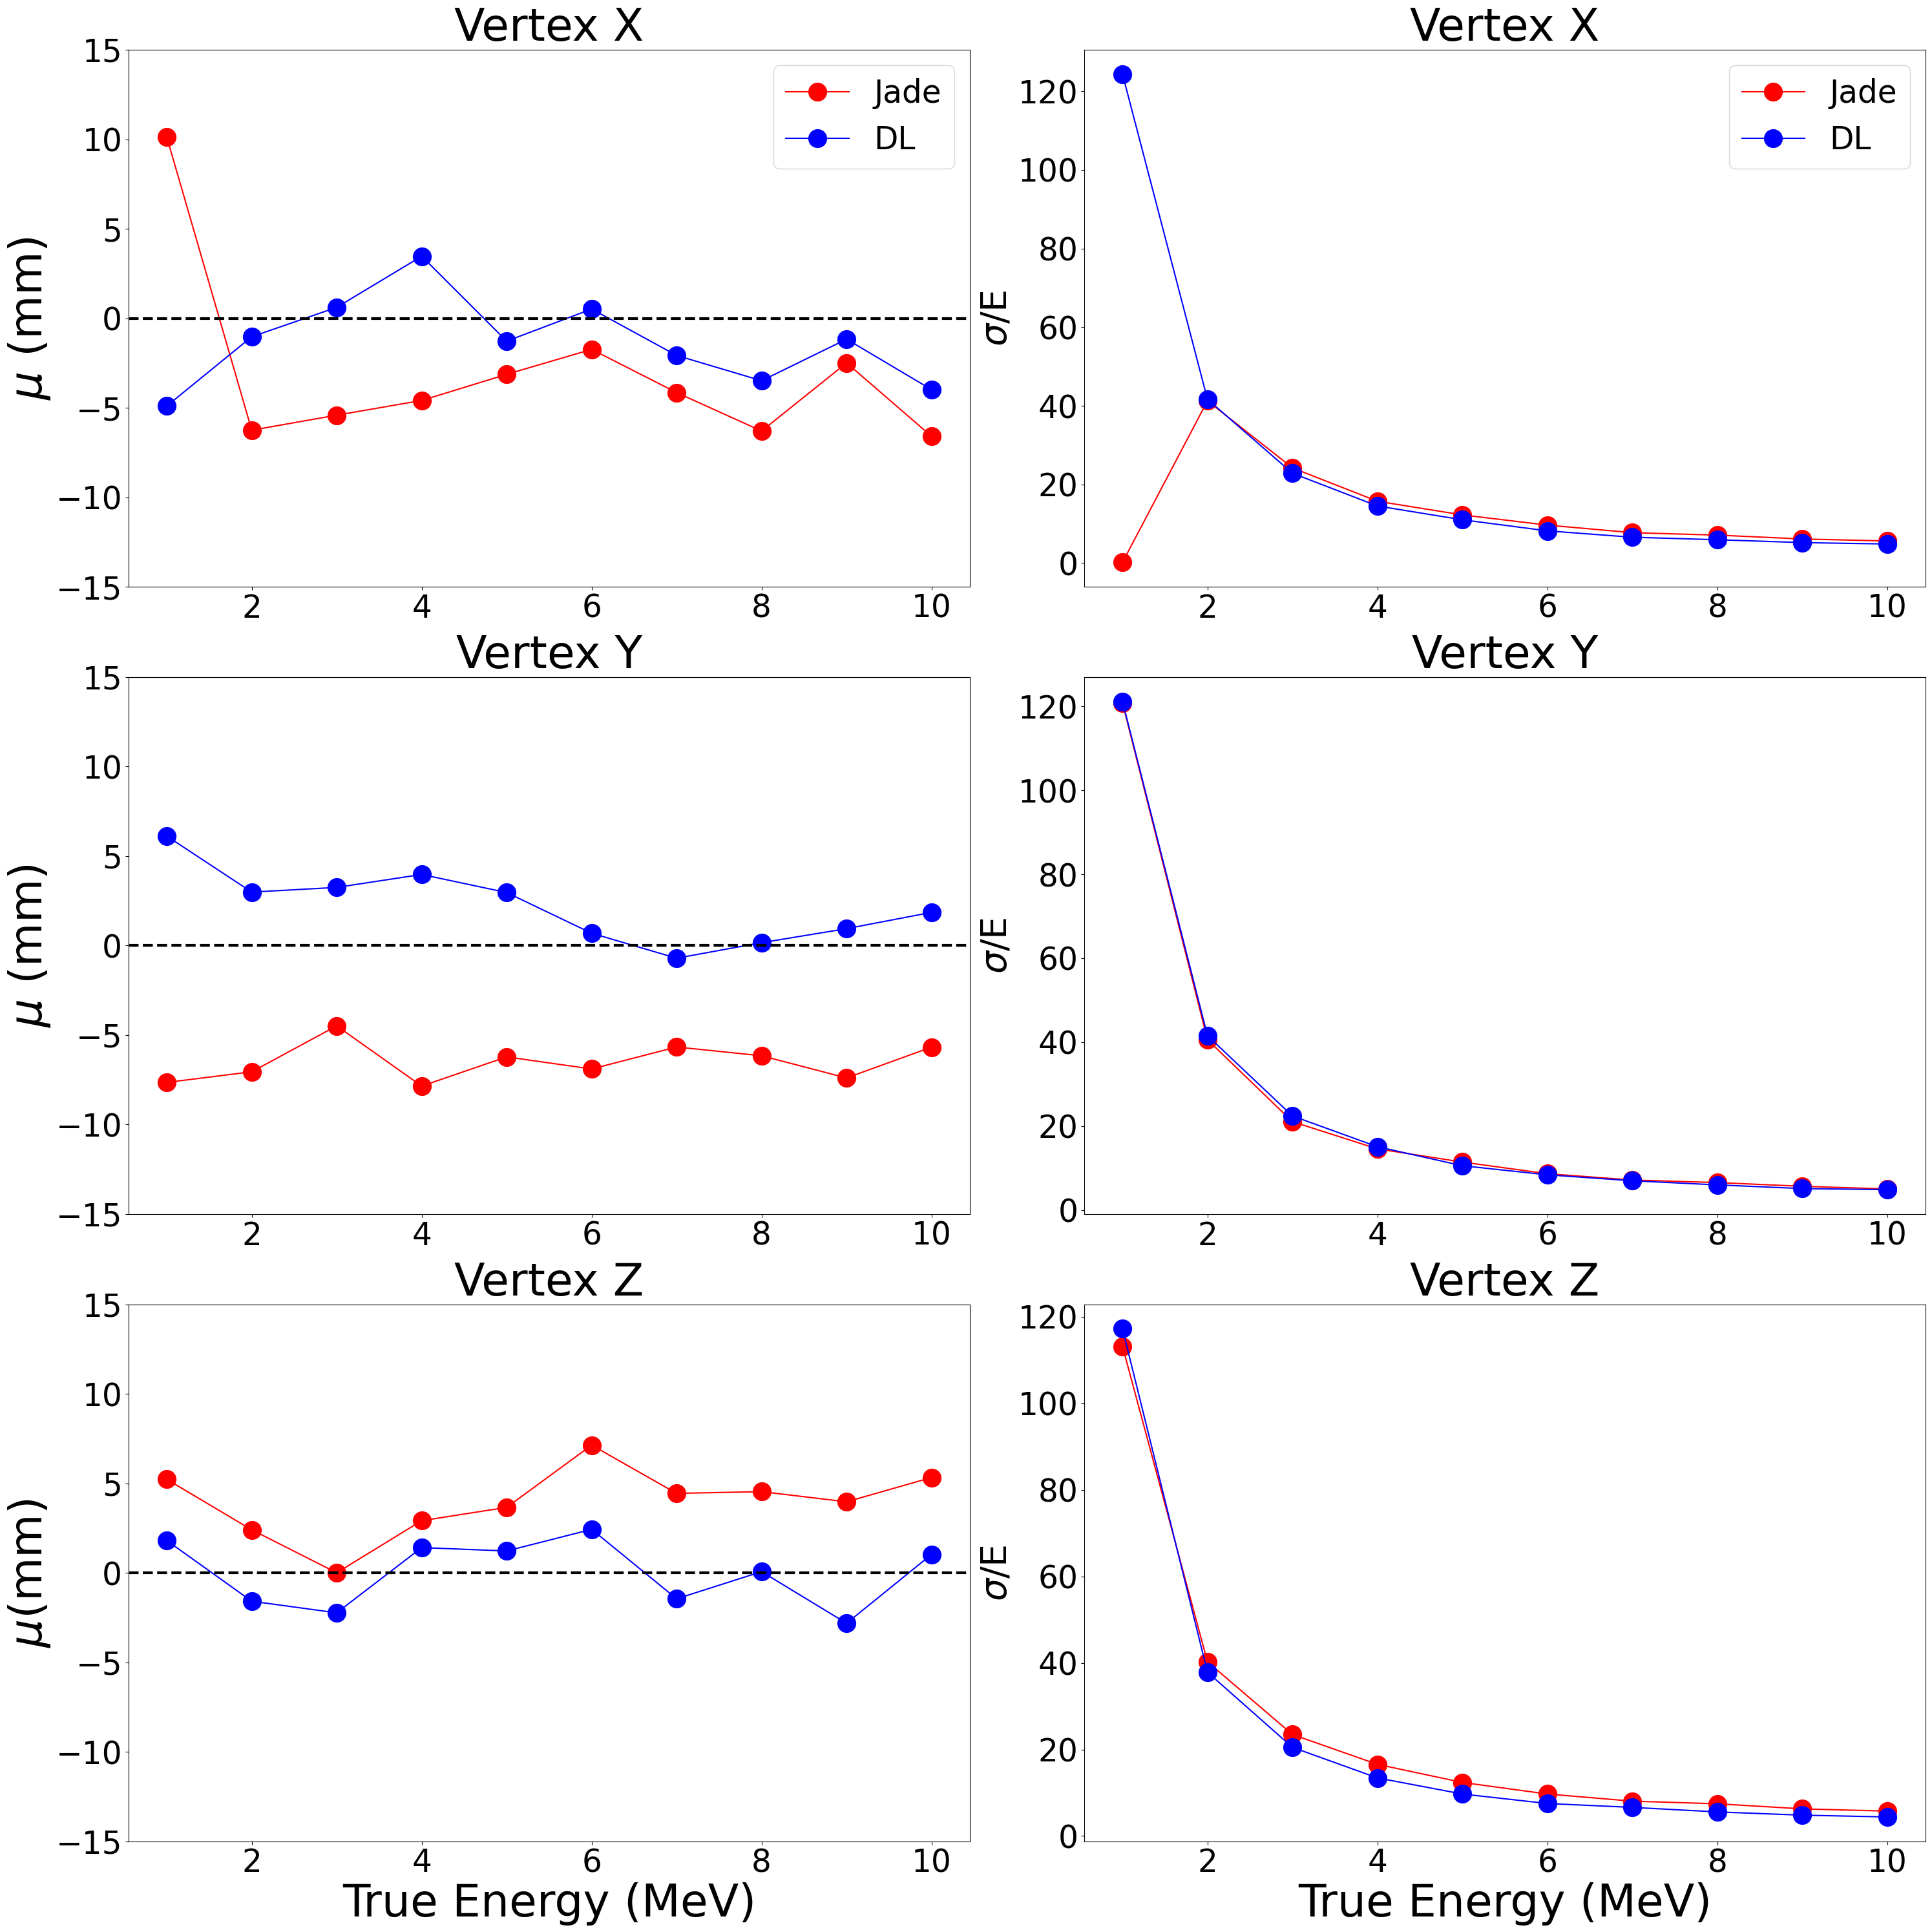

In [17]:
plt.rcParams['figure.figsize'] = (30, 30)


######################################

plt.subplot(3,2,1)
plt.plot(energy_list,np.array(ja_mu_x),'o-r',markersize = 20, label = 'Jade')
plt.plot(energy_list,np.array(re_mu_x),'o-b',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
# plt.title('\nGaussian fitting \n$\mu$',fontsize = 50)
plt.title('Vertex X',fontsize = 50)
plt.ylabel('$\mu$ (mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,2,3)
plt.plot(energy_list,np.array(ja_mu_y),'o-r',markersize = 20, label = 'Jade')
plt.plot(energy_list,np.array(re_mu_y),'o-b',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
plt.title('Vertex Y',fontsize = 50)
plt.ylabel('$\mu$ (mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,2,5)
plt.plot(energy_list,np.array(ja_mu_z),'o-r',markersize = 20, label = 'Jade')
plt.plot(energy_list,np.array(re_mu_z),'o-b',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
plt.title('Vertex Z',fontsize = 50)
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\mu$(mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-15,15])



plt.subplot(3,2,2)
plt.plot(energy_list,np.abs(ja_si_x)/np.array(energy_list),'o-r',markersize=20,label = 'Jade')
plt.plot(energy_list,np.abs(re_si_x)/np.array(energy_list),'o-b',markersize=20,label = 'DL')
plt.title('\nGaussian fitting \n$\sigma$/$\sqrt{N}$',fontsize = 50)
plt.ylabel('$\sigma$/E',fontsize = 40)
plt.title('Vertex X',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)


plt.subplot(3,2,4)
plt.plot(energy_list,np.abs(ja_si_y)/np.array(energy_list),'o-r',markersize=20,label = 'Jade')
plt.plot(energy_list,np.abs(re_si_y)/np.array(energy_list),'o-b',markersize=20,label = 'DL')
plt.ylabel('$\sigma$/E',fontsize = 40)
plt.title('Vertex Y',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)


plt.subplot(3,2,6)
plt.plot(energy_list,np.abs(ja_si_z)/np.array(energy_list),'o-r',markersize=20,label = 'Jade')
plt.plot(energy_list,np.abs(re_si_z)/np.array(energy_list),'o-b',markersize=20,label = 'DL')
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\sigma$/E',fontsize = 40)
plt.title('Vertex Z',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

plt.tight_layout()
plt.show()



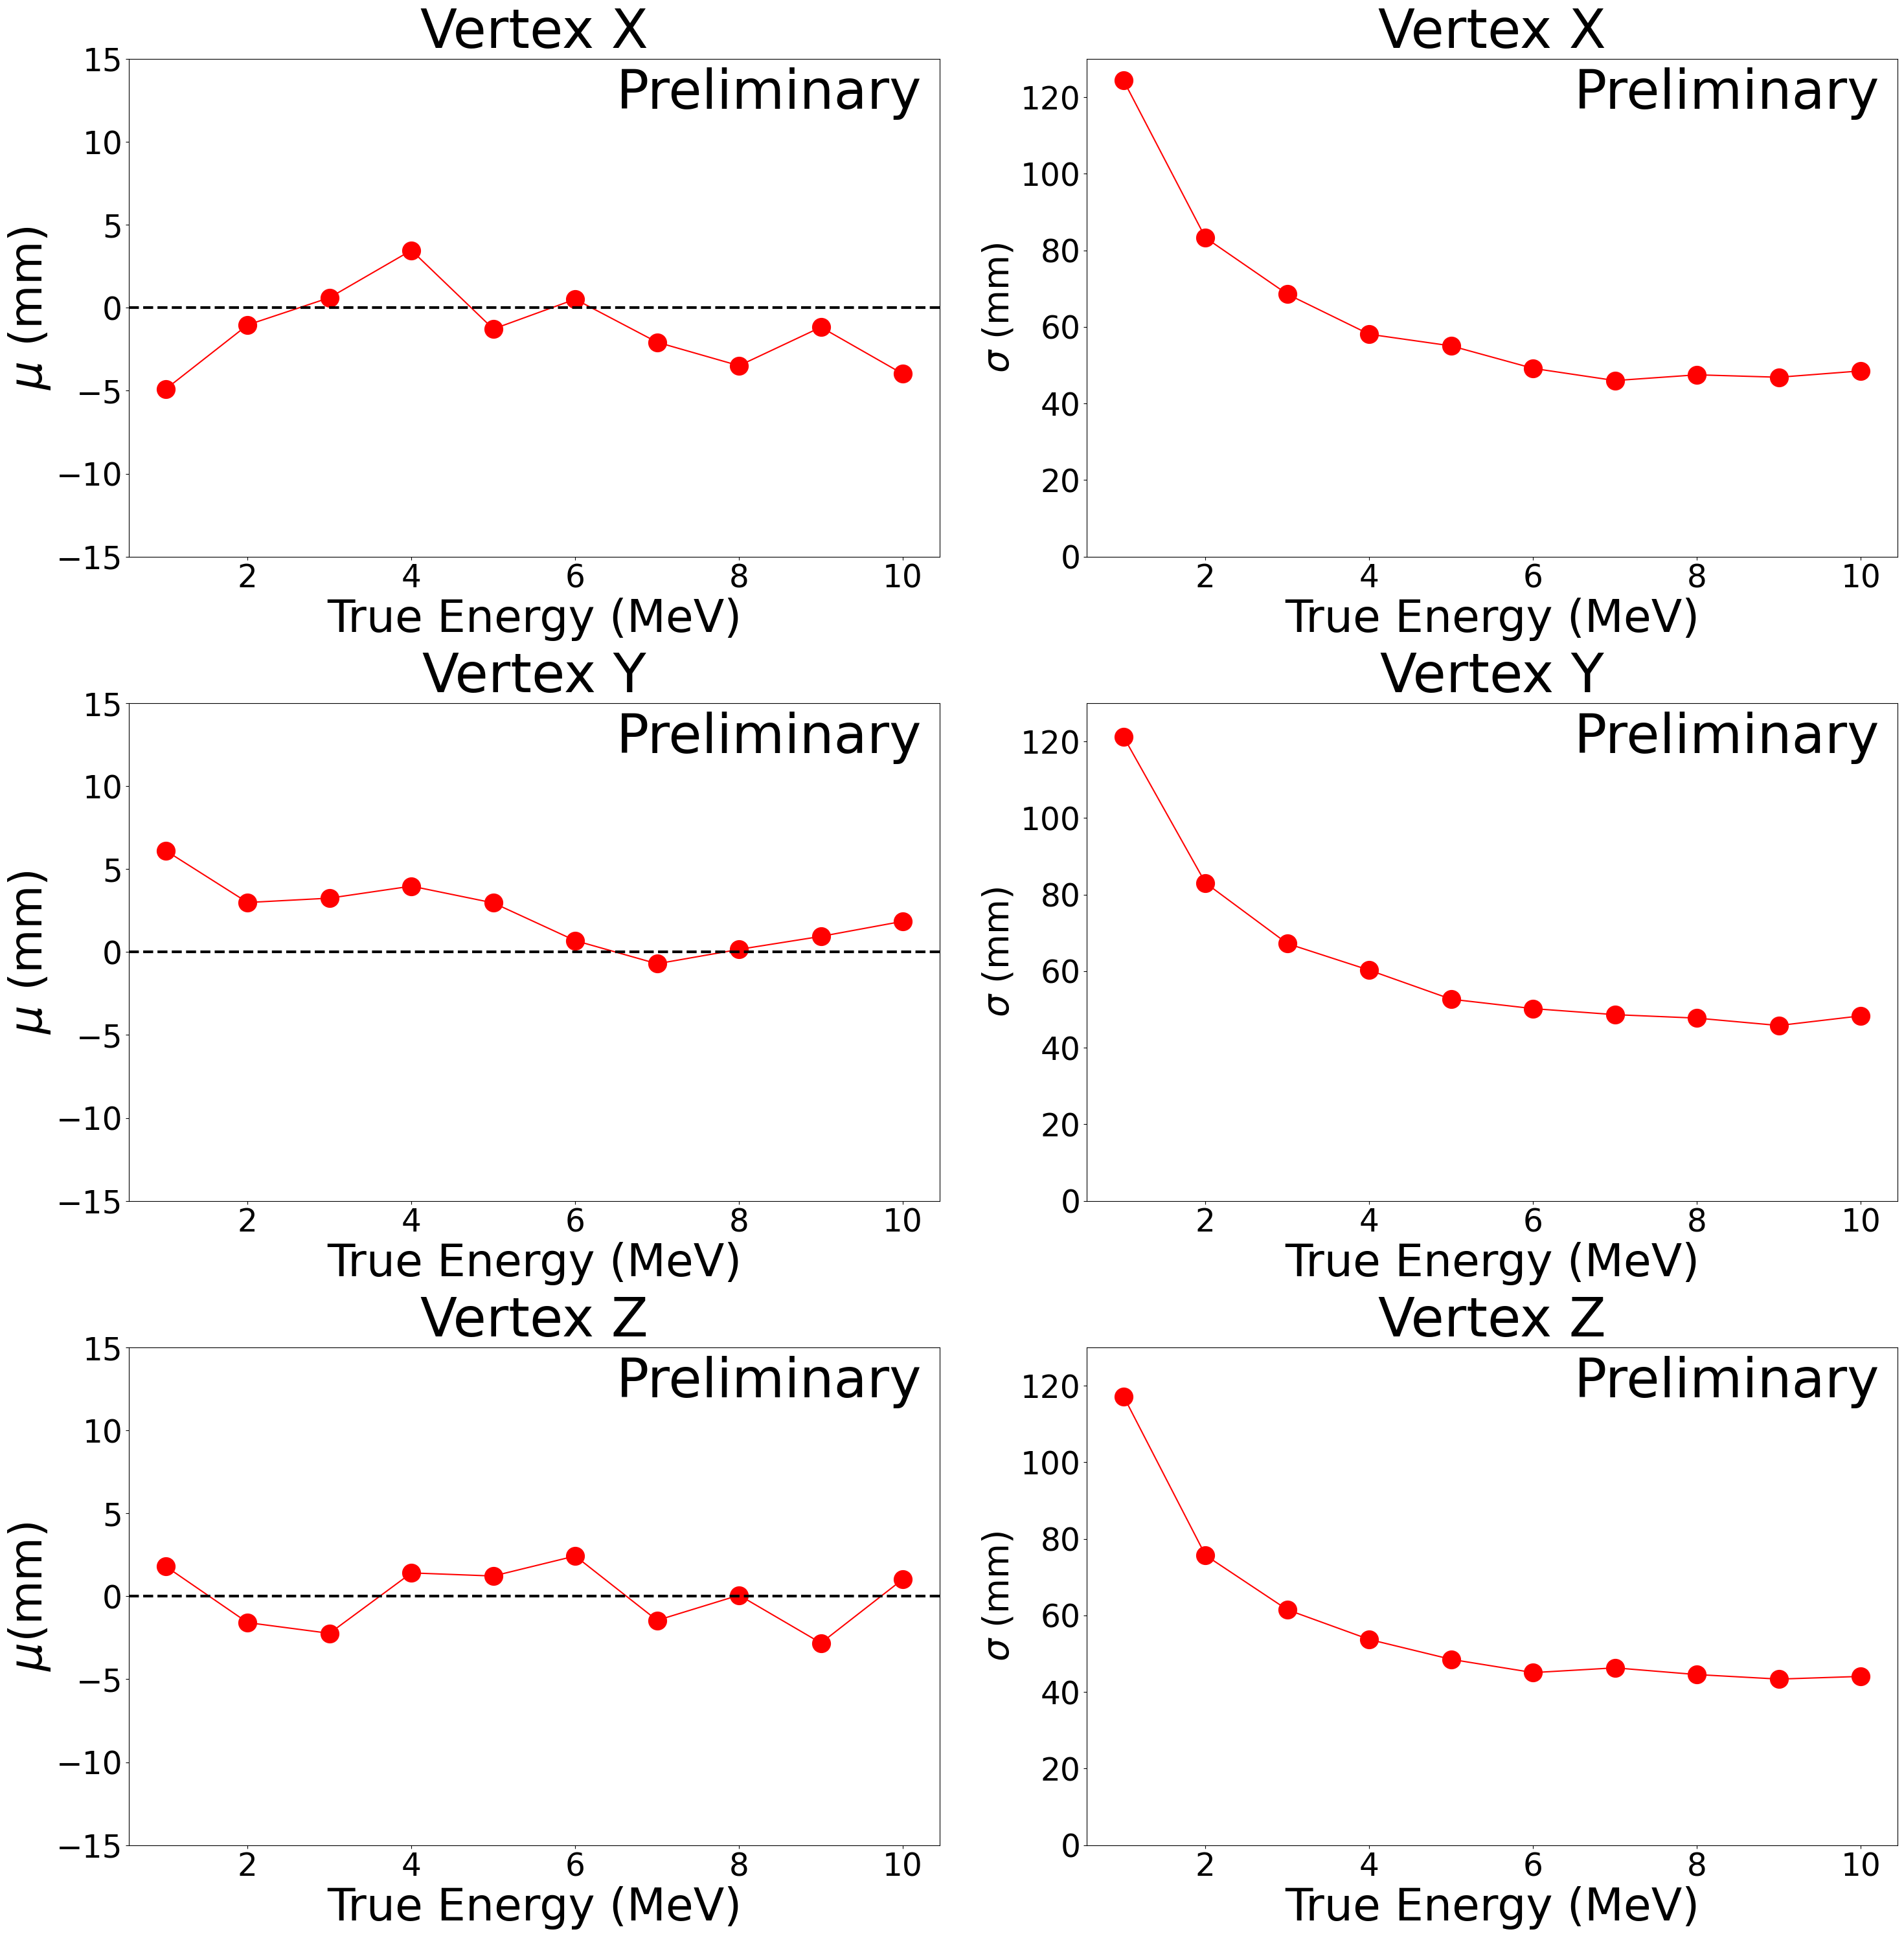

In [18]:
plt.rcParams['figure.figsize'] = (30, 30)


######################################

plt.subplot(3,2,1)
plt.plot(energy_list,np.array(re_mu_x),'o-r',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
# plt.title('\nGaussian fitting \n$\mu$',fontsize = 50)
plt.title('Vertex X',fontsize = 60)
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\mu$ (mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.text(6.5,12,"Preliminary",fontsize=60)

# plt.legend(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,2,3)
plt.plot(energy_list,np.array(re_mu_y),'o-r',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
plt.title('Vertex Y',fontsize = 60)
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\mu$ (mm)',fontsize = 50)

plt.text(6.5,12,"Preliminary",fontsize=60)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,2,5)
plt.plot(energy_list,np.array(re_mu_z),'o-r',markersize = 20, label = 'DL')
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
plt.title('Vertex Z',fontsize = 60)

plt.text(6.5,12,"Preliminary",fontsize=60)
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\mu$(mm)',fontsize = 50)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-15,15])



plt.subplot(3,2,2)
plt.plot(energy_list,np.abs(re_si_x),'o-r',markersize=20,label = 'DL')
plt.title('\nGaussian fitting \n$\sigma$/$\sqrt{N}$',fontsize = 50)
plt.ylabel('$\sigma$ (mm)',fontsize = 40)
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.title('Vertex X',fontsize = 60)

plt.text(6.5,117,"Preliminary",fontsize=60)
plt.ylim([0,130])
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)


plt.subplot(3,2,4)
plt.plot(energy_list,np.abs(re_si_y),'o-r',markersize=20,label = 'DL')
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\sigma$ (mm)',fontsize = 40)
plt.title('Vertex Y',fontsize = 60)
plt.text(6.5,117,"Preliminary",fontsize=60)

plt.ylim([0,130])
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)


plt.subplot(3,2,6)
plt.plot(energy_list,np.abs(re_si_z),'o-r',markersize=20,label = 'DL')
plt.xlabel('True Energy (MeV)',fontsize = 50)
plt.ylabel('$\sigma$ (mm)',fontsize = 40)
plt.title('Vertex Z',fontsize = 60)
plt.text(6.5,117,"Preliminary",fontsize=60)

plt.ylim([0,130])
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)

plt.tight_layout()
plt.show()

